<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/Finalised_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocessing**

#### **Data Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('traincsv.csv', low_memory = False)
train_data

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756,5292,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.4,3893.4,3448.44,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


In [3]:
train_data.columns

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'],
      dtype='object')

In [4]:
train_data.shape

(774155, 6)

In [5]:
train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,object
fresh_sales,object
dry_sales,object
cluster_catgeory,object


Changing the data types of the column & handling the error values

In [6]:
problematic_rows = train_data[~train_data["luxury_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["luxury_sales"]])

                               luxury_sales
4234                                    NaN
4333                                    NaN
5375                                    NaN
5408                                    NaN
78367                                   NaN
78380                                   NaN
80043     One thousand four hundread ruppes
174628                                  NaN
175278                                  nul
296621                                  nul
297911               Eight hundread ruppess
326593              six hundread and hirty 
327258                                  NaN
327259                                  NaN
327260                                  NaN
327261                                  NaN
329847                                  NaN
329848                                  NaN
329849                                  NaN
352298                                  NaN
352662                                  NaN
352663                          

In [7]:
# Here we took out everything which are not numeric in luxury_sales column.

problematic_rows = train_data[~train_data["luxury_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["luxury_sales"]].drop_duplicates())  # Show unique problematic values


                               luxury_sales
4234                                    NaN
80043     One thousand four hundread ruppes
175278                                  nul
297911               Eight hundread ruppess
326593              six hundread and hirty 
497177               Thousand tow hundread 
497245      seven hundread and nine ruppees
558562  Three thousand two hundread ruppess
753131   Four thousand one hundread ruppess


In [8]:
#80043     One thousand four hundread ruppes
train_data.loc[80043,"luxury_sales"] = 1400

#297911               Eight hundread ruppess
train_data.loc[297911,"luxury_sales"] = 800

#326593              six hundread and hirty
train_data.loc[326593,"luxury_sales"] = 630

#497177               Thousand tow hundread
train_data.loc[497177,"luxury_sales"] = 1200

#497245      seven hundread and nine ruppees
train_data.loc[497245,"luxury_sales"] = 709

#558562  Three thousand two hundread ruppess
train_data.loc[558562,"luxury_sales"] = 3002

#753131   Four thousand one hundread ruppess
train_data.loc[753131,"luxury_sales"] = 4100

train_data['luxury_sales'] = train_data['luxury_sales'].replace('nul', np.nan)

In [9]:
#checking whether they got replaced properly

cleaned_problematic_values = [80043,297911,326593,497177,497245,558562,753131,175278,296621,367935]
train_data.loc[cleaned_problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
80043,10774052.0,Kelaniya,1400,1118,5934,4
297911,10189925.0,Kelaniya,800,4003.84,1059.84,2
326593,10467590.0,Nuwara Eliya,630,3420.3,894.54,2
497177,10537755.0,Kandy,1200,2041,6939.4,1
497245,10468127.0,Kandy,709,1032.48,4194.45,1
558562,10076064.0,Trincomalee,3002,10416.9,1923.12,6
753131,10695296.0,Batticaloa,4100,4286.72,4034.56,3
175278,10347733.0,Peliyagoda,NaN,4286.28,nul,2
296621,10215937.0,Panadura,NaN,8155.11,nul,2
367935,10445384.0,Galle,NaN,1919.13,7563.63,2


In [10]:
train_data['luxury_sales'] = train_data['luxury_sales'].astype(float)
train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,float64
fresh_sales,object
dry_sales,object
cluster_catgeory,object


In [11]:
problematic_rows = train_data[~train_data["fresh_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["fresh_sales"]])

                                fresh_sales
4326                                    NaN
4327                                    NaN
4333                                    NaN
4929                                    NaN
5379                                    NaN
5403                                    NaN
5408                                    NaN
78367                                   NaN
78380                                   NaN
78400                                   NaN
161810         Six hundread and five ruppes
174714                                  nul
268571                                  nul
326334     Three thousana and five hundread
326763                                  NaN
326764                                  NaN
326765                                  NaN
327495                                  nul
327505                                  nul
329931                                  NaN
352298                                  NaN
352658                          

In [12]:
problematic_rows = train_data[~train_data["fresh_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["fresh_sales"]].drop_duplicates())  # Show unique problematic values

                                fresh_sales
4326                                    NaN
161810         Six hundread and five ruppes
174714                                  nul
326334     Three thousana and five hundread
558897             thirteen thousand ruppes
752816                 Five thousand ruppes
753256  Two thousand seven hundread ruppess


In [13]:
#161810         Six hundread and five ruppes
train_data.loc[161810,"fresh_sales"] = 605

#326334     Three thousana and five hundread
train_data.loc[326334,"fresh_sales"] = 3500

#558897             thirteen thousand ruppes
train_data.loc[558897,"fresh_sales"] = 13000

#752816                 Five thousand ruppes
train_data.loc[752816,"fresh_sales"] = 5000

#753256  Two thousand seven hundread ruppess
train_data.loc[753256,"fresh_sales"] = 2700

train_data["fresh_sales"] = train_data["fresh_sales"].replace("nul",np.nan)

In [14]:
#checking whether they got replaced properly

cleaned_problematic_values = [161810,326334,558897,752816,753256,174714,268571,327495,327505,]
train_data.loc[cleaned_problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
161810,10261075.0,Panadura,887.36,605,3604.9,4
326334,10006007.0,Kaduwela,758.52,3500,1029.42,2
558897,10314616.0,Batticaloa,3027.36,13000,2081.31,6
752816,10369123.0,Trincomalee,5501.57,5000,5679.04,3
753256,10369199.0,Colombo,2692.80,2700,2861.1,1
174714,10358037.0,Nuwara Eliya,1012.34,NaN,1446.2,2
268571,10047014.0,Panadura,1808.30,NaN,nul,2
327495,10099173.0,Wattala,1303.92,NaN,nul,2
327505,10312003.0,Kaduwela,1303.06,NaN,nul,2


In [15]:
train_data["fresh_sales"] = train_data["fresh_sales"].astype(float)
train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,object
cluster_catgeory,object


In [16]:
problematic_rows = train_data[~train_data["dry_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["dry_sales"]])

                                    dry_sales
4929                                      NaN
78400                                     NaN
148029  Four thousand and two hundread ruppes
174631                                    nul
174720                                    nul
175278                                    nul
268571                                    nul
296621                                    nul
327168                                    NaN
327169                                    NaN
327170                                    NaN
327171                                    NaN
327172                                    NaN
327173                                    NaN
327174                                    NaN
327495                                    nul
327505                                    nul
329931                                    NaN
345090                                    NaN
345091                                    NaN
345092                            

In [17]:
problematic_rows = train_data[~train_data["dry_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["dry_sales"]].drop_duplicates())  # Show unique problematic values


                                    dry_sales
4929                                      NaN
148029  Four thousand and two hundread ruppes
174631                                    nul


In [18]:
#148029   Four thousand and two hundread ruppes
train_data.loc[148029,"dry_sales"] = 4200

train_data["dry_sales"] = train_data["dry_sales"].replace("nul", np.nan)

In [19]:
cleaned_problematic_values = [148029,174631,174720,175278,268571,296621,327495,327505]
train_data.loc[cleaned_problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
148029,10190107.0,Dehiwala-Mount Lavinia,931.50,931.50,4200,4
174631,10273730.0,Homagama,1074.36,5141.58,NaN,2
174720,10039004.0,Kaduwela,944.44,4722.20,NaN,2
175278,10347733.0,Peliyagoda,NaN,4286.28,NaN,2
268571,10047014.0,Panadura,1808.30,NaN,NaN,2
296621,10215937.0,Panadura,NaN,8155.11,NaN,2
327495,10099173.0,Wattala,1303.92,NaN,NaN,2
327505,10312003.0,Kaduwela,1303.06,NaN,NaN,2


In [20]:
train_data["dry_sales"] = train_data["dry_sales"].astype(float)
train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,object


Checking missing values

In [21]:
train_data.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,38
fresh_sales,45
dry_sales,37
cluster_catgeory,1


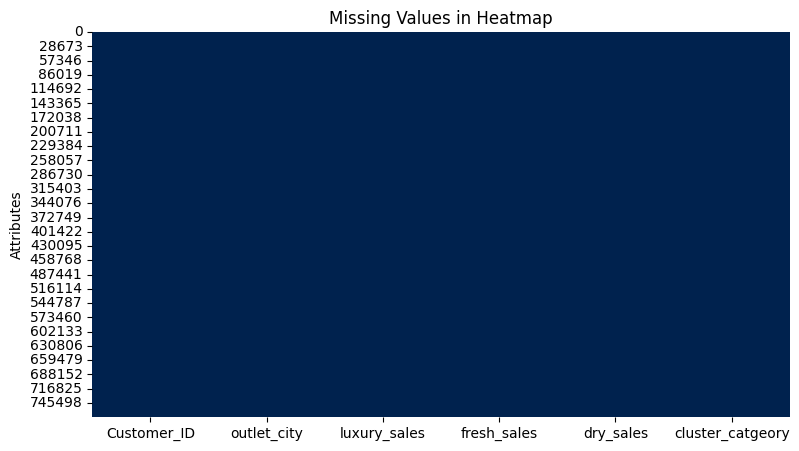

In [22]:
plt.figure(figsize=(9, 5))
sns.heatmap(data = train_data.isnull(), cmap ='cividis', cbar = False)
plt.title('Missing Values in Heatmap')
plt.ylabel('Attributes')
plt.show()

Checking duplicated values

In [23]:
print(f'Number of fully duplicated rows: {train_data.duplicated().sum()}')  # Count of fully duplicated rows
print(f'Number of duplicated values in customer ID:{(train_data["Customer_ID"].duplicated().sum())}')  # Count of duplicate customer IDs

Number of fully duplicated rows: 0
Number of duplicated values in customer ID:1


Checking unique values

In [24]:
print(f"Number of unique values in Customer_ID column: {train_data['Customer_ID'].nunique()}")

Number of unique values in Customer_ID column: 774153


In [25]:
print(f"Number of unique values in outlet_city: {train_data['outlet_city'].nunique()}")
print(f"outlet_city names: {train_data['outlet_city'].unique()}")

Number of unique values in outlet_city: 20
outlet_city names: ['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy' nan]


In [26]:
print(f"Number of unique values in cluster_category: {train_data['cluster_catgeory'].nunique()}")
print(f"cluster_category values: {train_data['cluster_catgeory'].unique()}")

Number of unique values in cluster_category: 12
cluster_category values: ['4' '1' '99' '2' '5' '3' '6' '6\\' '95' '98' nan '100' '89']


Descriptive statistics

In [27]:
train_data.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales
count,7.741530e+05,774117.000000,774110.000000,774118.000000
mean,1.038708e+07,1921.963172,4428.683485,4676.279783
std,2.234795e+05,1004.081116,3334.661775,3409.384574
min,1.000000e+07,500.000000,500.000000,500.000000
25%,1.019354e+07,1213.520000,1620.190000,1787.940000
50%,1.038708e+07,1715.280000,3356.510000,3727.760000
75%,1.058062e+07,2338.700000,6671.610000,7162.200000
max,1.077415e+07,6999.650000,13997.900000,13999.300000


In [28]:
print(f"luxury_sales median value: {train_data['luxury_sales'].median()}")
print(f"fresh_sales median value: {train_data['fresh_sales'].median()}")
print(f"dry_sales median value: {train_data['dry_sales'].median()}")

luxury_sales median value: 1715.28
fresh_sales median value: 3356.51
dry_sales median value: 3727.76


In [29]:
train_data.describe(include = "object")

,outlet_city,cluster_catgeory
count,774153,774154
unique,20,12
top,Colombo,1
freq,41031,188984


In [30]:
print(f"outlet_city mode value: {train_data['outlet_city'].mode()[0]}")
print(f"cluster_category mode value: {train_data['cluster_catgeory'].mode()[0]}")

outlet_city mode value: Colombo
cluster_category mode value: 1


Checking outliers for numeric type columns

In [31]:
q1 = train_data["luxury_sales"].quantile(0.25)
q3 = train_data["luxury_sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
luxury_sales_outliers = train_data[(train_data["luxury_sales"] < lower_bound) | (train_data["luxury_sales"] > upper_bound)]
print(f"Number of outliers in luxury_sales: {len(luxury_sales_outliers)}")

outliers_percentage = (len(luxury_sales_outliers) / len(train_data)) * 100

print(f"Percentage of outliers in luxury_sales: {outliers_percentage:.2f}%")
luxury_sales_outliers

Number of outliers in luxury_sales: 35056
Percentage of outliers in luxury_sales: 4.53%


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
327511,10310841.0,Kelaniya,4514.84,4806.12,4514.84,5
327515,10171582.0,Kelaniya,4248.30,3998.40,4248.30,5
327521,10673354.0,Kaduwela,5053.76,4607.84,4756.48,5
327522,10378099.0,Dehiwala-Mount Lavinia,4169.40,4725.32,4725.32,5
327525,10086692.0,Peliyagoda,4428.93,4160.51,4563.14,5
...,...,...,...,...,...,...
774148,10471967.0,Gampaha,5264.00,4935.00,5264.00,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


In [32]:
def count_boxplot_values(data, column_name):

    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    counts = {
        'Lower Whisker': len(data[(data[column_name] >= data[column_name].min()) & (data[column_name] < lower_bound)]),
        'Q1 to Median': len(data[(data[column_name] >= lower_bound) & (data[column_name] < q1)]),
        'Median to Q3': len(data[(data[column_name] >= q1) & (data[column_name] < q3)]),
        'Q3 to Upper Whisker': len(data[(data[column_name] >= q3) & (data[column_name] < upper_bound)]),
        'Upper Whisker': len(data[(data[column_name] >= upper_bound) & (data[column_name] <= data[column_name].max())])
    }

    return counts

counts = count_boxplot_values(train_data, 'luxury_sales')
counts

{'Lower Whisker': 0,
 'Q1 to Median': 193524,
 'Median to Q3': 387063,
 'Q3 to Upper Whisker': 158474,
 'Upper Whisker': 35056}

In [33]:
q1 = train_data["fresh_sales"].quantile(0.25)
q3 = train_data["fresh_sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
fresh_sales_outliers = train_data[(train_data["fresh_sales"] < lower_bound) | (train_data["fresh_sales"] > upper_bound)]
print(f"Number of outliers in fresh_sales: {len(fresh_sales_outliers)}")
outliers_percentage = (len(fresh_sales_outliers) / len(train_data)) * 100
print(f"Percentage of outliers in fresh_sales: {outliers_percentage:.2f}%")
fresh_sales_outliers

Number of outliers in fresh_sales: 0
Percentage of outliers in fresh_sales: 0.00%


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory


In [34]:
q1 = train_data["dry_sales"].quantile(0.25)
q3 = train_data["dry_sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
dry_sales_outliers = train_data[(train_data["dry_sales"] < lower_bound) | (train_data["dry_sales"] > upper_bound)]
print(f"Number of outliers in dry_sales: {len(dry_sales_outliers)}")
outliers_percentage = (len(dry_sales_outliers) / len(train_data)) * 100
print(f"Percentage of outliers in dry_sales: {outliers_percentage:.2f}%")
dry_sales_outliers

Number of outliers in dry_sales: 0
Percentage of outliers in dry_sales: 0.00%


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory


Initial EDA

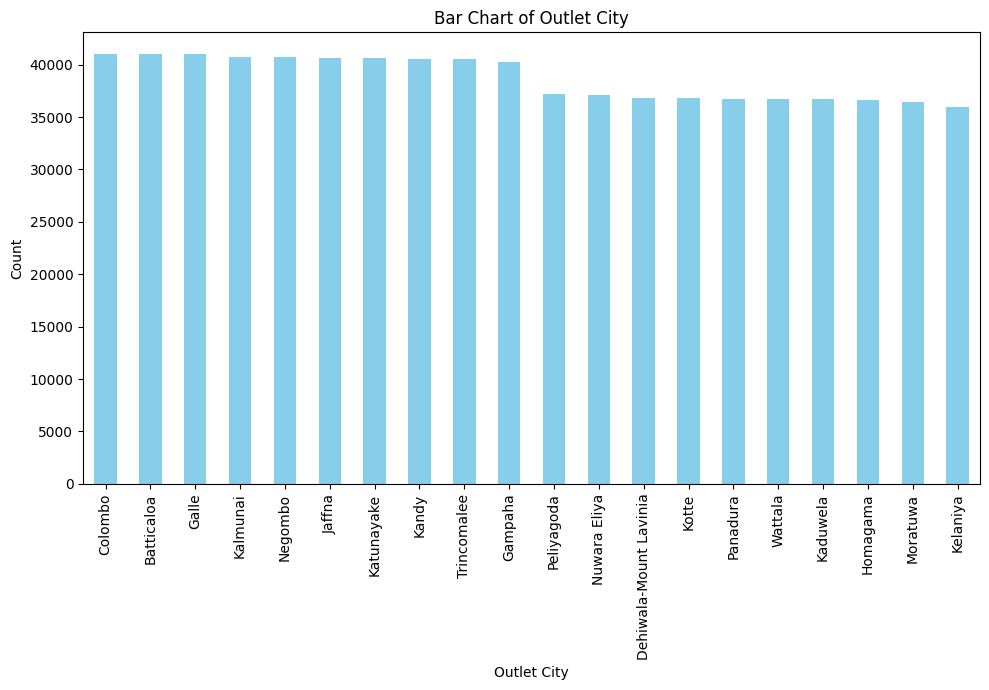

In [35]:
outlet_city_counts = train_data["outlet_city"].value_counts()

plt.figure(figsize = (10,7))
outlet_city_counts.plot(kind = "bar", color = "skyblue")
plt.title("Bar Chart of Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

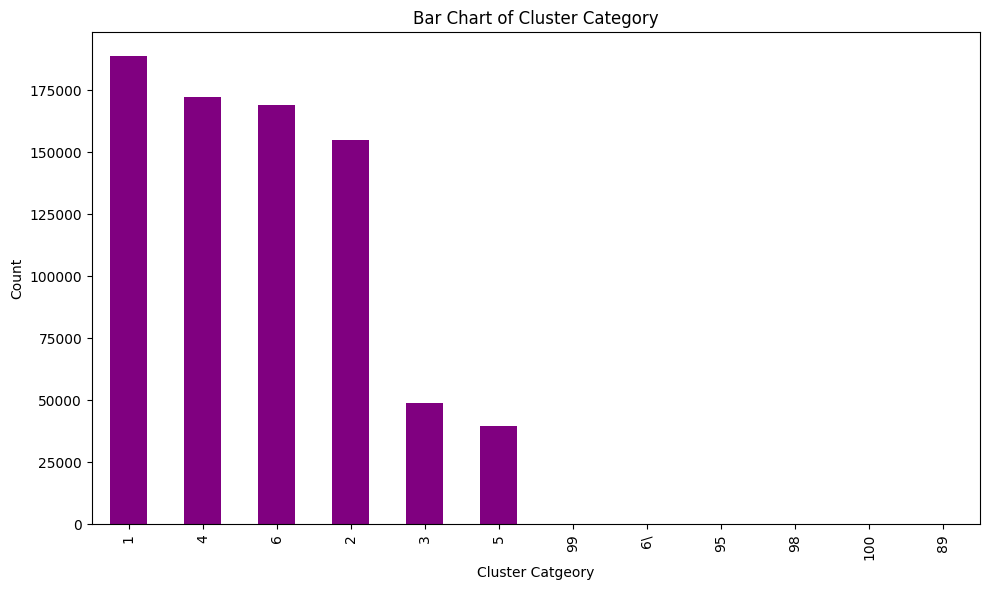

In [36]:
outlet_city_counts = train_data["cluster_catgeory"].value_counts()

plt.figure(figsize = (10,6))
outlet_city_counts.plot(kind = "bar", color = "purple")
plt.title("Bar Chart of Cluster Category")
plt.xlabel("Cluster Catgeory")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

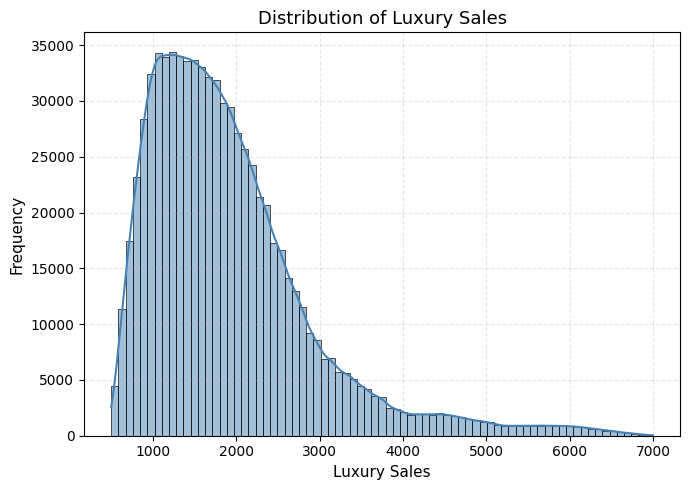

Luxury Sales 
 Mean value: 1921.9631720657212 
 Median value: 1715.28 
 Mode value: 1029.6


In [41]:
plt.figure(figsize = [7,5])
sns.histplot(data = train_data, bins = 75, x = "luxury_sales", kde = True, color = "steelblue")
plt.title("Distribution of Luxury Sales", fontsize = 13)
plt.xlabel("Luxury Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

print(f"Luxury Sales \n Mean value: {train_data['luxury_sales'].mean()} \n Median value: {train_data['luxury_sales'].median()} \n Mode value: {train_data['luxury_sales'].mode()[0]}")

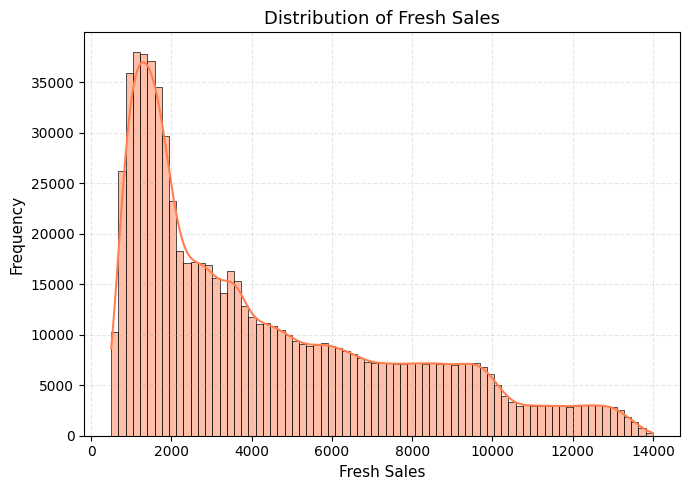

Fresh Sales 
 Mean value: 4428.6834854219705 
 Median value: 3356.51 
 Mode value: 1071.0


In [42]:
plt.figure(figsize = [7,5])
sns.histplot(data = train_data, bins = 75, x = "fresh_sales", kde = True, color = "coral")
plt.title("Distribution of Fresh Sales", fontsize = 13)
plt.xlabel("Fresh Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

print(f"Fresh Sales \n Mean value: {train_data['fresh_sales'].mean()} \n Median value: {train_data['fresh_sales'].median()} \n Mode value: {train_data['fresh_sales'].mode()[0]}")

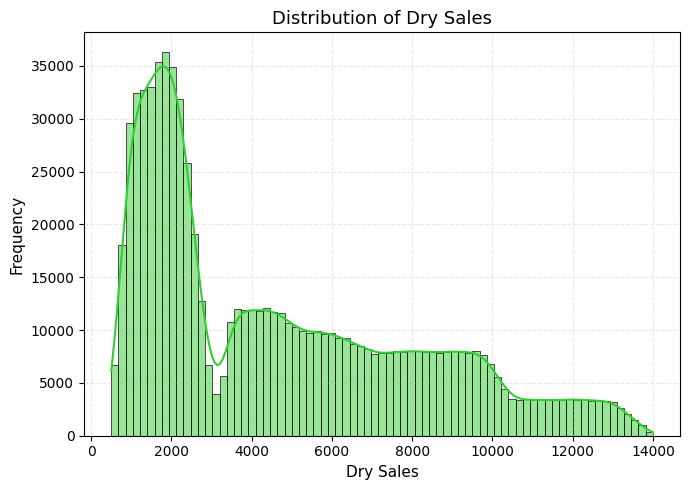

Dry Sales 
 Mean value: 4676.279783405113 
 Median value: 3727.76 
 Mode value: 1096.2


In [43]:
plt.figure(figsize = [7,5])
sns.histplot(data = train_data, bins = 75, x = "dry_sales", kde = True, color = "limegreen")
plt.title("Distribution of Dry Sales", fontsize = 13)
plt.xlabel("Dry Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

print(f"Dry Sales \n Mean value: {train_data['dry_sales'].mean()} \n Median value: {train_data['dry_sales'].median()} \n Mode value: {train_data['dry_sales'].mode()[0]}")

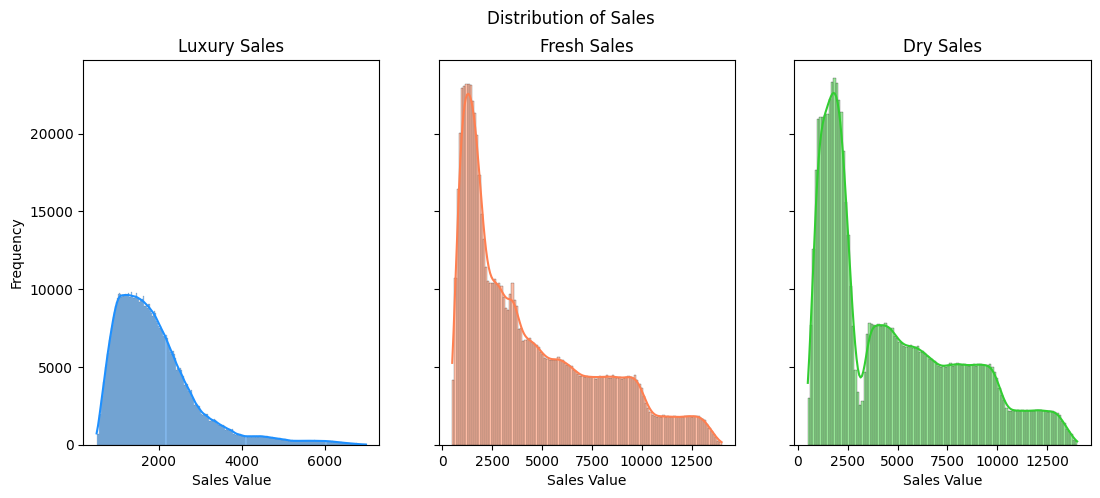

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5), sharey=True)
fig.suptitle("Distribution of Sales")

sns.histplot(train_data["luxury_sales"], ax=axes[0], color="dodgerblue", kde=True)
axes[0].set_title("Luxury Sales")
axes[0].set_xlabel("Sales Value")
axes[0].set_ylabel("Frequency")

sns.histplot(train_data["fresh_sales"], ax=axes[1], color="coral", kde=True)
axes[1].set_title("Fresh Sales")
axes[1].set_xlabel("Sales Value")

sns.histplot(train_data["dry_sales"], ax=axes[2], color="limegreen", kde=True)
axes[2].set_title("Dry Sales")
axes[2].set_xlabel("Sales Value")

plt.show()

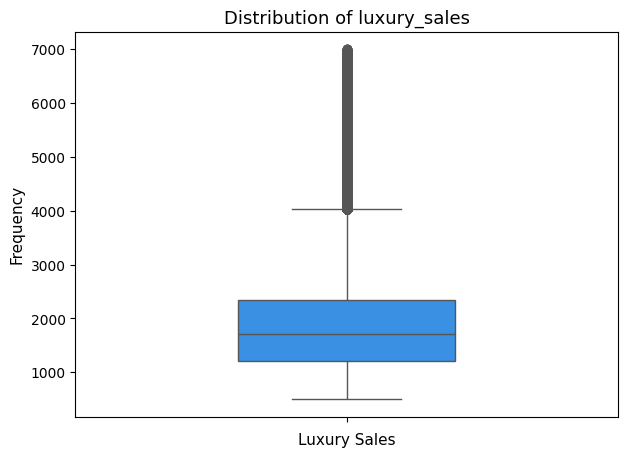

In [37]:
plt.figure(figsize = [7,5])
sns.boxplot(data = train_data, y = "luxury_sales", color = "dodgerblue", width = 0.4)
plt.title("Distribution of luxury_sales", fontsize = 13)
plt.xlabel("Luxury Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.show()

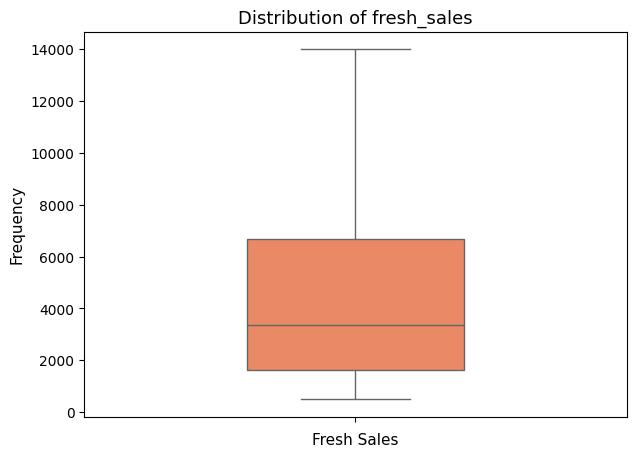

In [38]:
plt.figure(figsize = [7,5])
sns.boxplot(data = train_data, y = "fresh_sales", color = "coral", width = 0.4)
plt.title('Distribution of fresh_sales', fontsize = 13)
plt.xlabel('Fresh Sales', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.show()

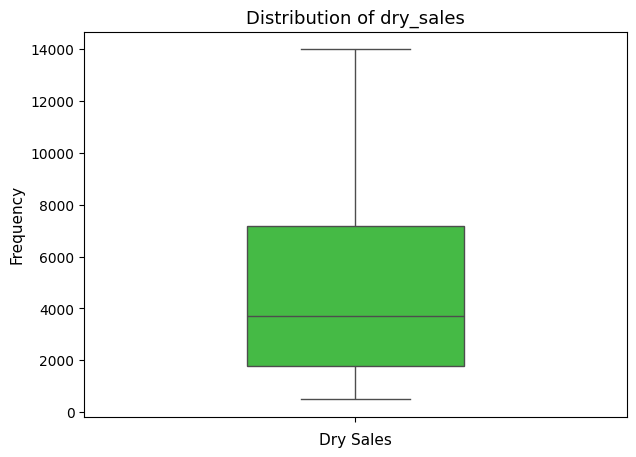

In [39]:
plt.figure(figsize = [7,5])
sns.boxplot(data = train_data, y = "dry_sales", color = "limegreen", width = 0.4)
plt.title("Distribution of dry_sales", fontsize = 13)
plt.xlabel("Dry Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.show()

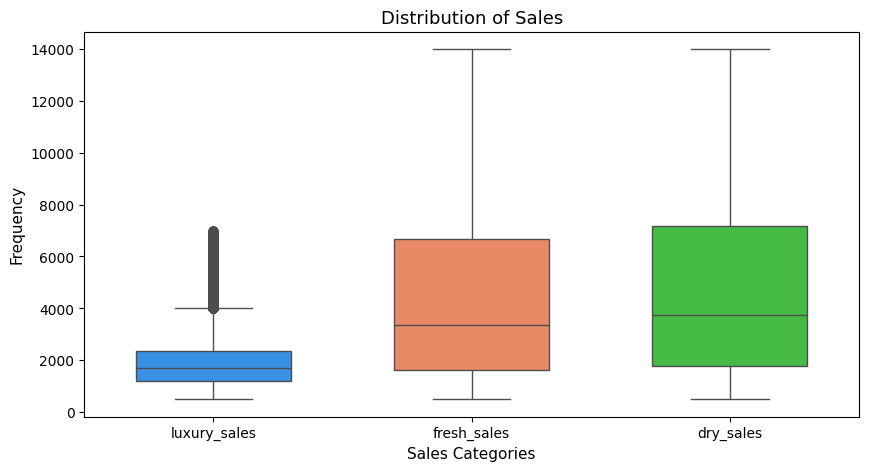

In [40]:
plt.figure(figsize = [10, 5])
sns.boxplot(data = train_data[["luxury_sales", "fresh_sales", "dry_sales"]],
            palette = ["dodgerblue", "coral", "limegreen"], width = 0.6)
plt.title("Distribution of Sales", fontsize = 13)
plt.xlabel("Sales Categories", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.show()

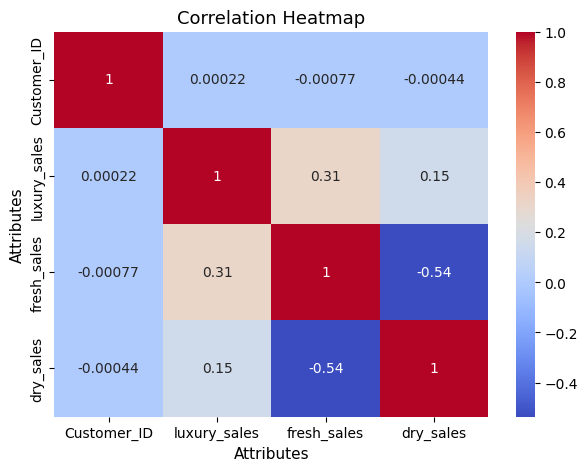

In [45]:
correlation = train_data.select_dtypes(include = np.number).corr()

plt.figure(figsize = [7,5])
sns.heatmap(correlation, annot = True, cmap = "coolwarm")
plt.xlabel("Attributes", fontsize = 11)
plt.ylabel("Attributes", fontsize = 11)
plt.title("Correlation Heatmap", fontsize = 13)
plt.show()

#### **Data Cleaning**

In [46]:
train_data["Customer_ID"] = train_data["Customer_ID"].astype(str)
train_data.dtypes

,0
Customer_ID,object
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,object


In [48]:
train_data.drop(["Customer_ID"], axis = 1, inplace = True)
train_data.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,Kelaniya,1209.60,756.00,5292.00,4
1,Moratuwa,1590.12,1060.08,6007.12,1
2,Wattala,2288.88,1481.04,9155.52,4
3,Wattala,2274.94,1739.66,9099.76,4
4,Kelaniya,2345.49,2069.55,9243.99,4


In [49]:
train_data.isnull().sum()

,0
outlet_city,2
luxury_sales,38
fresh_sales,45
dry_sales,37
cluster_catgeory,1


In [ ]:
train_data["luxury_sales"] = train_data["luxury_sales"].fillna(train_data["luxury_sales"].median())
train_data["fresh_sales"] = train_data["fresh_sales"].fillna(train_data["fresh_sales"].median())
train_data["dry_sales"] = train_data["dry_sales"].fillna(train_data["dry_sales"].median())

train_data = train_data.dropna(subset = ["cluster_catgeory","outlet_city"])

train_data.isnull().sum()